### Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from IPython.display import Image
from scipy.stats import pearsonr

### Filter the Cases data, to get the Cases for the State of North Carolina

In [2]:
cases = pd.read_csv('../../Team/covid_confirmed_usafacts.csv')
cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [3]:
nc_cases = cases[cases["State"] == "NC"]
selected_date_columns = [col for col in nc_cases.columns if '2020-06-01' <= col <= '2021-01-03']
nc_cases = nc_cases[selected_date_columns]
nc_cases.head()

,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
1923,1,2,3,3,209,1,2,2,2,203,...,0,0,0,2,1,38,82,82,34,307
1924,364,368,382,398,427,451,465,494,519,544,...,9509,9509,9509,10120,10164,10274,10397,10397,10797,10876
1925,35,38,38,38,38,43,43,43,43,43,...,2367,2367,2367,2526,2564,2642,2662,2662,2755,2806
1926,17,18,18,22,24,28,28,29,30,30,...,558,558,558,611,619,633,638,638,670,674
1927,65,66,68,68,70,71,72,74,78,78,...,1284,1284,1284,1380,1383,1402,1407,1407,1464,1482


In [4]:
daily_cases_nc = []
for col in nc_cases.columns:
    daily_cases_nc.append(nc_cases[col].sum())
daily_cases_nc_data = pd.Series(daily_cases_nc)

### Filter the Deaths data, to get the Deaths for the State of North Carolina

In [5]:
deaths = pd.read_csv('../../Team/covid_deaths_usafacts.csv')
deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


In [6]:
nc_deaths = deaths[deaths["State"] == "NC"]
selected_date_columns = [col for col in nc_deaths.columns if '2020-06-01' <= col <= '2021-01-03']
nc_deaths = nc_deaths[selected_date_columns]

In [7]:
daily_deaths_nc = []
for col in nc_deaths.columns:
    daily_deaths_nc.append(nc_deaths[col].sum())
daily_deaths_nc_data = pd.Series(daily_deaths_nc)

# Utilize Linear and Non-Linear (polynomial with degree n) regression models to compare trends for the state of North Carolina

In [8]:
days = np.arange(len(daily_cases_nc_data))

lr_cases = LinearRegression()
lr_cases.fit(days.reshape(-1, 1), daily_cases_nc_data)
cases_linear_predictions = lr_cases.predict(days.reshape(-1, 1))

lr_deaths = LinearRegression()
lr_deaths.fit(days.reshape(-1, 1), daily_deaths_nc_data)
deaths_linear_predictions = lr_deaths.predict(days.reshape(-1, 1))

degree = 4
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(days.reshape(-1, 1))

pr_cases = LinearRegression()
pr_cases.fit(X_poly, daily_cases_nc_data)
cases_poly_predictions = pr_cases.predict(X_poly)

pr_deaths = LinearRegression()
pr_deaths.fit(X_poly, daily_deaths_nc_data)
deaths_poly_predictions = pr_deaths.predict(X_poly)

df = pd.DataFrame({'Days': days,
                   'Actual Cases': daily_cases_nc_data,
                   'Cases Linear Predictions': cases_linear_predictions,
                   f'Cases Polynomial (Degree {degree}) Predictions': cases_poly_predictions,
                   'Actual Deaths': daily_deaths_nc_data,
                   'Deaths Linear Predictions': deaths_linear_predictions,
                   f'Deaths Polynomial (Degree {degree}) Predictions': deaths_poly_predictions})

fig_cases = px.line(df, x='Days', y=['Actual Cases', 'Cases Linear Predictions',
                                    f'Cases Polynomial (Degree {degree}) Predictions'],
                    labels={'value': 'Number of Cases'}, title='Cases Linear vs. Polynomial Regression')
fig_cases.update_layout(width=1000, height=500)

fig_deaths = px.line(df, x='Days', y=['Actual Deaths', 'Deaths Linear Predictions',
                                      f'Deaths Polynomial (Degree {degree}) Predictions'],
                     labels={'value': 'Number of Deaths'}, title='Deaths Linear vs. Polynomial Regression')
fig_deaths.update_layout(width=1000, height=500)

fig_cases.write_image("fig_cases.png")
fig_deaths.write_image("fig_deaths.png")

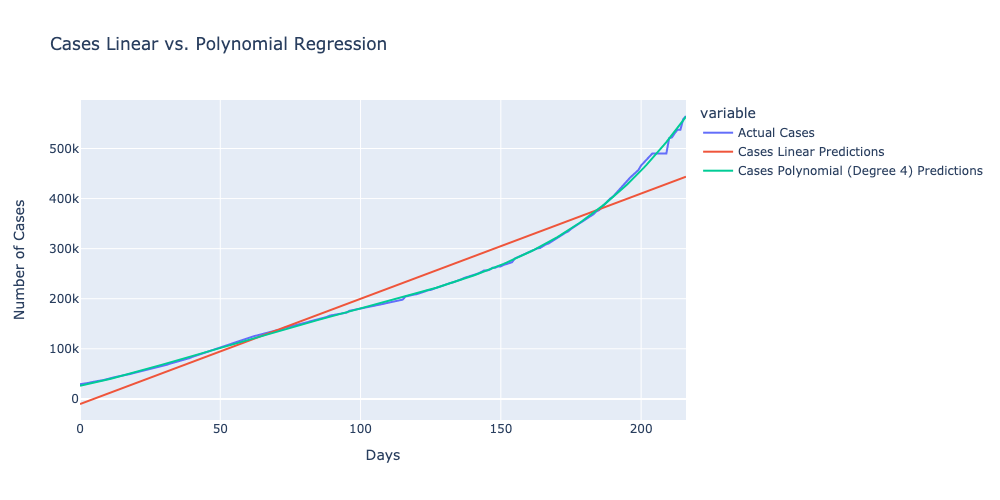

In [9]:
Image(filename="fig_cases.png")

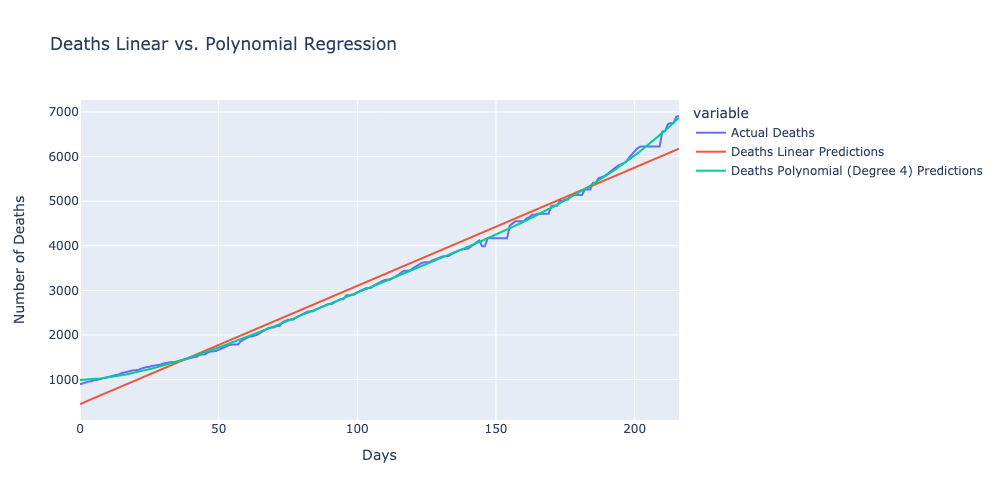

In [10]:
Image(filename="fig_deaths.png")

### Calcluate error using RMSE

In [11]:
rmse_linear_cases = np.sqrt(mean_squared_error(daily_cases_nc_data, cases_linear_predictions))
rmse_linear_deaths = np.sqrt(mean_squared_error(daily_deaths_nc_data, deaths_linear_predictions))
rmse_poly_cases = np.sqrt(mean_squared_error(daily_cases_nc_data, cases_poly_predictions))
rmse_poly_deaths = np.sqrt(mean_squared_error(daily_deaths_nc_data, deaths_poly_predictions))

print(f'RMSE for Cases (Linear): {rmse_linear_cases:.2f}')
print(f'RMSE for Deaths (Linear): {rmse_linear_deaths:.2f}\n')
print(f'RMSE for Cases (Polynomial Degree {degree}): {rmse_poly_cases:.2f}')
print(f'RMSE for Deaths (Polynomial Degree {degree}): {rmse_poly_deaths:.2f}')

RMSE for Cases (Linear): 33090.67
RMSE for Deaths (Linear): 220.45

RMSE for Cases (Polynomial Degree 4): 3530.59
RMSE for Deaths (Polynomial Degree 4): 53.25


In [12]:
days_cases = range(len(daily_cases_nc_data))
days_deaths = range(len(daily_deaths_nc_data))

In [13]:
model = smf.ols('daily_cases_nc_data ~ days_cases', data=df)
results = model.fit()

alpha = 0.05

predictions_cases = results.get_prediction(df).summary_frame(alpha=alpha)

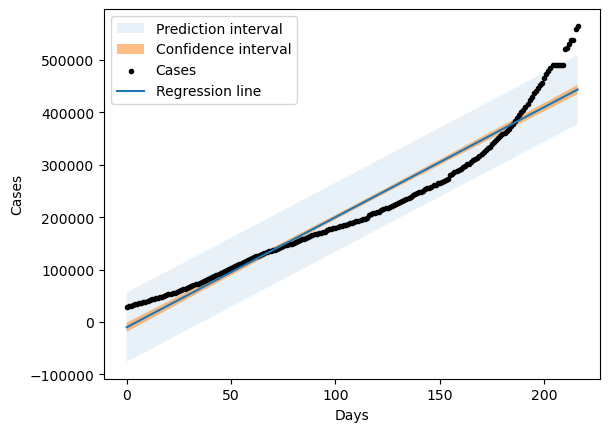

In [14]:
plt.fill_between(days_cases, predictions_cases['obs_ci_lower'], predictions_cases['obs_ci_upper'], alpha=.1, label='Prediction interval')
plt.fill_between(days_cases, predictions_cases['mean_ci_lower'], predictions_cases['mean_ci_upper'], alpha=.5, label='Confidence interval')
plt.scatter(days_cases, daily_cases_nc_data, label='Cases', marker='.', color='black')
plt.plot(days_cases, predictions_cases['mean'], label='Regression line')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [15]:
model = smf.ols('daily_deaths_nc_data ~ days_deaths', data=df)
results = model.fit()

alpha = 0.05

predictions_deaths = results.get_prediction(df).summary_frame(alpha=alpha)

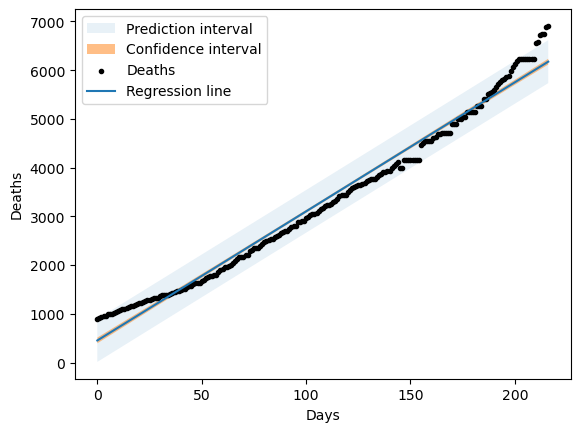

In [16]:
plt.fill_between(days_deaths, predictions_deaths['obs_ci_lower'], predictions_deaths['obs_ci_upper'], alpha=.1, label='Prediction interval')
plt.fill_between(days_deaths, predictions_deaths['mean_ci_lower'], predictions_deaths['mean_ci_upper'], alpha=.5, label='Confidence interval')
plt.scatter(days_deaths, daily_deaths_nc_data, label='Deaths', marker='.', color='black')
plt.plot(days_deaths, predictions_deaths['mean'], label='Regression line')
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.legend()
plt.show()

### Identify Top 5 counties with the highest Cases within North Carolina

In [17]:
cases = pd.read_csv('../../Team/covid_confirmed_usafacts.csv')

selected_date_columns = [col for col in cases.columns if '2020-06-01' <= col <= '2021-01-03']
additional_columns = ["County Name", "State"]
selected_columns = additional_columns + selected_date_columns
selected_cases = cases[selected_columns]

nc_cases = selected_cases[selected_cases["State"] == "NC"]

In [18]:
nc_cases.reset_index(drop=True, inplace=True)

In [19]:
max_cases = {}
for i in range(0, nc_cases.shape[0]):
    row = nc_cases.iloc[i]
    numeric_values = row[row.apply(lambda x: pd.api.types.is_numeric_dtype(x))]
    total_cases = numeric_values.sum()
    county_name = row['County Name']
    max_cases[county_name] = total_cases

import heapq
top_5_counties_cases = heapq.nlargest(5, max_cases, key=max_cases.get)

print("Top 5 counties with high cases:")
print(top_5_counties_cases)

Top 5 counties with high cases:
['Mecklenburg County ', 'Wake County ', 'Guilford County ', 'Forsyth County ', 'Durham County ']


### Describe the trends of the Top 5 counties with the highest Cases within North Carolina

In [20]:
nc_cases.set_index('County Name', inplace=True)
nc_cases.drop(columns='State', inplace=True)
nc_cases.head()

/var/folders/_m/rft3g50d1wgfkqjj9z_4vxd40000gn/T/ipykernel_97091/4213071226.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
County Name,,,,,,,,,,,,,,,,,,,,,
Statewide Unallocated,1,2,3,3,209,1,2,2,2,203,...,0,0,0,2,1,38,82,82,34,307
Alamance County,364,368,382,398,427,451,465,494,519,544,...,9509,9509,9509,10120,10164,10274,10397,10397,10797,10876
Alexander County,35,38,38,38,38,43,43,43,43,43,...,2367,2367,2367,2526,2564,2642,2662,2662,2755,2806
Alleghany County,17,18,18,22,24,28,28,29,30,30,...,558,558,558,611,619,633,638,638,670,674
Anson County,65,66,68,68,70,71,72,74,78,78,...,1284,1284,1284,1380,1383,1402,1407,1407,1464,1482


In [21]:
def plotDailyCases(county_name, degree=2):
    county_data = nc_cases.loc[nc_cases.index == county_name]

    daily_cases_trend = []
    
    for col in county_data.columns:
        daily_cases_trend.append(county_data[col].values)
    
    daily_cases_trend_data = [item for sublist in daily_cases_trend for item in sublist]

    days = np.arange(len(daily_cases_trend_data))

    # Linear Regression
    lr = LinearRegression()
    lr.fit(days.reshape(-1, 1), daily_cases_trend_data)
    linear_predictions = lr.predict(days.reshape(-1, 1))

    # Polynomial Regression
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(days.reshape(-1, 1))

    pr = LinearRegression()
    pr.fit(X_poly, daily_cases_trend_data)
    poly_predictions = pr.predict(X_poly)

    df = pd.DataFrame({'Days': days,
                       'New Cases': daily_cases_trend_data,
                       'Linear Predictions': linear_predictions,
                       f'Polynomial (Degree {degree}) Predictions': poly_predictions})

    fig = px.line(df, x='Days', y=['New Cases', 'Linear Predictions',
                                    f'Polynomial (Degree {degree}) Predictions'],
                    labels={'y': 'Number of New Cases', 'x': 'Days'},
                    title=f'Daily Cases Trend for {county_name}')
    fig.update_layout(width=1000, height=500)

    fig.write_image(f'daily_cases_trend_{county_name}.png')

In [22]:
for county in top_5_counties_cases:
    plotDailyCases(county, degree=4)

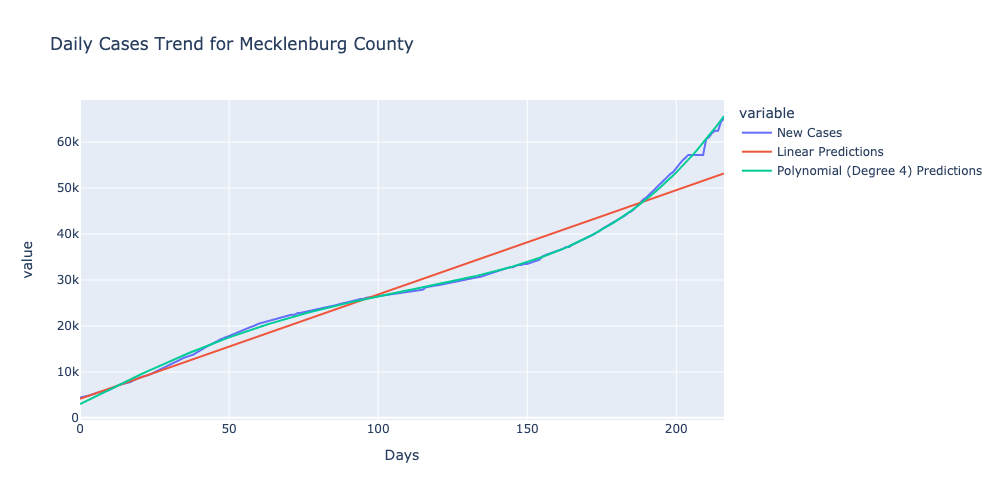

In [23]:
Image(filename="daily_cases_trend_Mecklenburg County .png")

__Trend observed for Mecklenburg County:__ Starting June 2020 the cases were low, only about 5,000, but over time the COVID-19 cases increased day by day. By January 2021, there were almost 70,000 COVID-19 cases in Mecklenburg County.

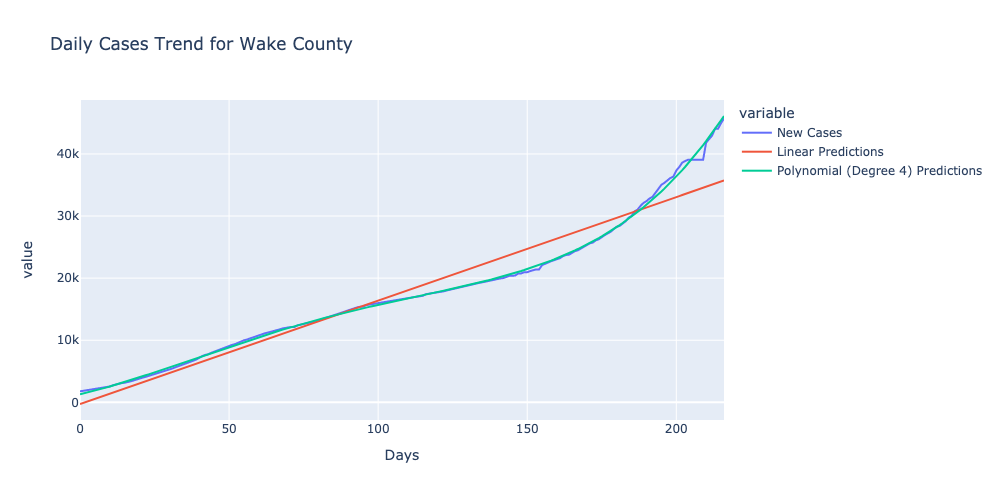

In [24]:
Image(filename="daily_cases_trend_Wake County .png")

__Trend observed for Wake County:__ Starting June 2020 the cases were low, only about 3,000, but over time the COVID-19 cases increased day by day. By January 2021, there were almost 50,000 COVID-19 cases in Wake County.

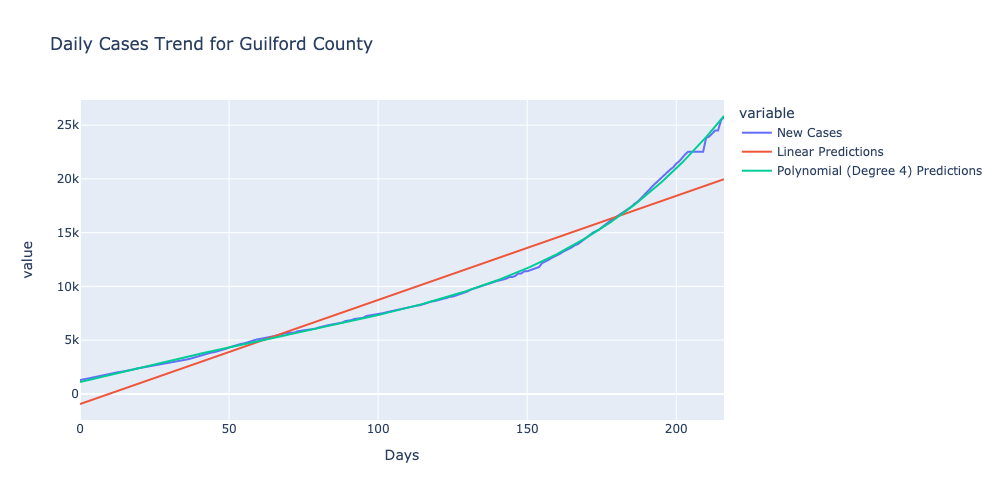

In [25]:
Image(filename="daily_cases_trend_Guilford County .png")

__Trend observed for Guilford County:__ Starting June 2020 the cases were low, only about 2,000, but over time the COVID-19 cases increased day by day. By January 2021, there were almost 26,000 COVID-19 cases in Guilford County.

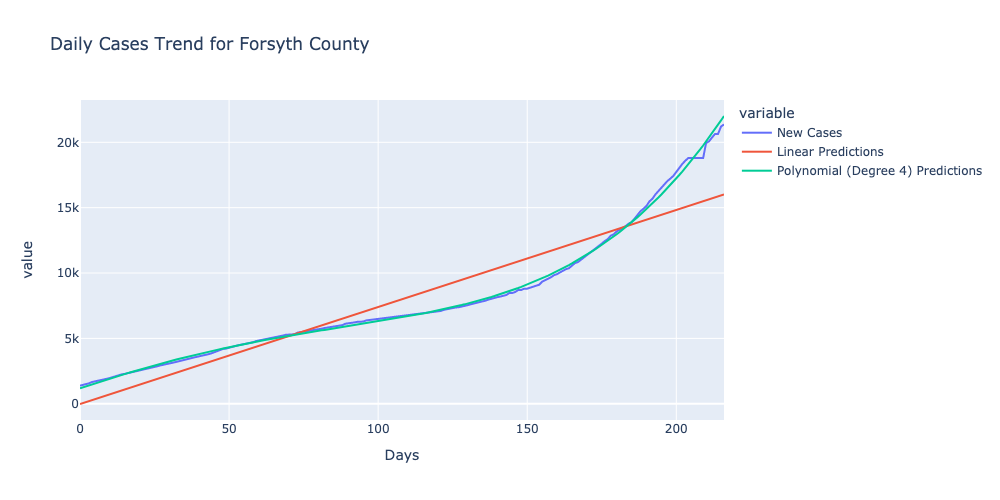

In [26]:
Image(filename="daily_cases_trend_Forsyth County .png")

__Trend observed for Forsyth County:__ Starting June 2020 the cases were low, only about 2,000, but over time the COVID-19 cases increased day by day. By January 2021, there were almost 23,000 COVID-19 cases in Forsyth County.

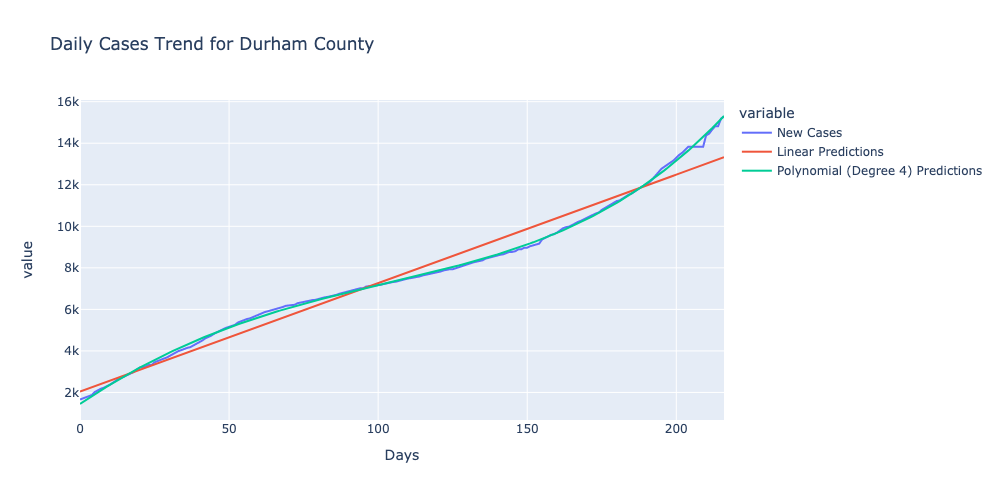

In [27]:
Image(filename="daily_cases_trend_Durham County .png")

__Trend observed for Durham County:__ Starting June 2020 the cases were low, close to 2,000, but over time the COVID-19 cases increased day by day. By January 2021, there were almost 16,000 COVID-19 cases in Durham County.

### Perform hypothesis tests on questions identified in Stage III

- Continuously rising employment led to an increase in COVID-19 cases.
- Increasing wages led to an increase in COVID-19 cases due to encouraged employment from high wages.
- Low wages led to an increase in COVID-19 cases due to missing COVID-19 health resources.

### Testing Hypothesis

In [28]:
employment_jul_aug_sep = pd.read_excel('../Project Stage III/allhlcn203.xlsx')
nc_employment_jul_aug_sep = employment_jul_aug_sep[employment_jul_aug_sep["St Name"] == "North Carolina"]
nc_employment_jul_aug_sep = nc_employment_jul_aug_sep[["July Employment", "August Employment", "September Employment"]]

employment_oct_nov_dec = pd.read_excel('../Project Stage III/allhlcn204.xlsx')
nc_employment_oct_nov_dec = employment_oct_nov_dec[employment_oct_nov_dec["St Name"] == "North Carolina"]
nc_employment_oct_nov_dec = nc_employment_oct_nov_dec[["October Employment", "November Employment", "December Employment"]]

In [29]:
arr = []
for col in nc_employment_jul_aug_sep.columns:
    arr.append(nc_employment_jul_aug_sep[col].sum())
    
for col in nc_employment_oct_nov_dec.columns:
    arr.append(nc_employment_oct_nov_dec[col].sum())
    
nc_employment_data = pd.Series(arr)

### Hypothesis 1: Continuously rising employment led to an increase in COVID-19 cases

__Null Hypothesis (H0):__ There is no significant relationship between continuously rising employment and the increase in COVID-19 cases.  
__Alternative Hypothesis (H1):__ Continuously rising employment is associated with a significant increase in COVID-19 cases.

In [30]:
nc_employment_jul = nc_employment_jul_aug_sep["July Employment"].sum()
nc_employment_aug = nc_employment_jul_aug_sep["August Employment"].sum()
nc_employment_sep = nc_employment_jul_aug_sep["September Employment"].sum()

nc_employment_oct = nc_employment_oct_nov_dec["October Employment"].sum()
nc_employment_nov = nc_employment_oct_nov_dec["November Employment"].sum()
nc_employment_dec = nc_employment_oct_nov_dec["December Employment"].sum()

months = ["July", "August", "September", "October", "November", "December"]
employment_sums = [nc_employment_jul, nc_employment_aug, nc_employment_sep, nc_employment_oct, nc_employment_nov, nc_employment_dec]

data = {
    'Jul 2020 - Dec 2020': months,
    'Employment': employment_sums
}

fig = px.line(data, x='Jul 2020 - Dec 2020', y='Employment', title='Monthly Employment from Jul 2020 - Dec 2020')
fig.update_layout(width=1000, height=500)
fig.write_image(f'employment.png')

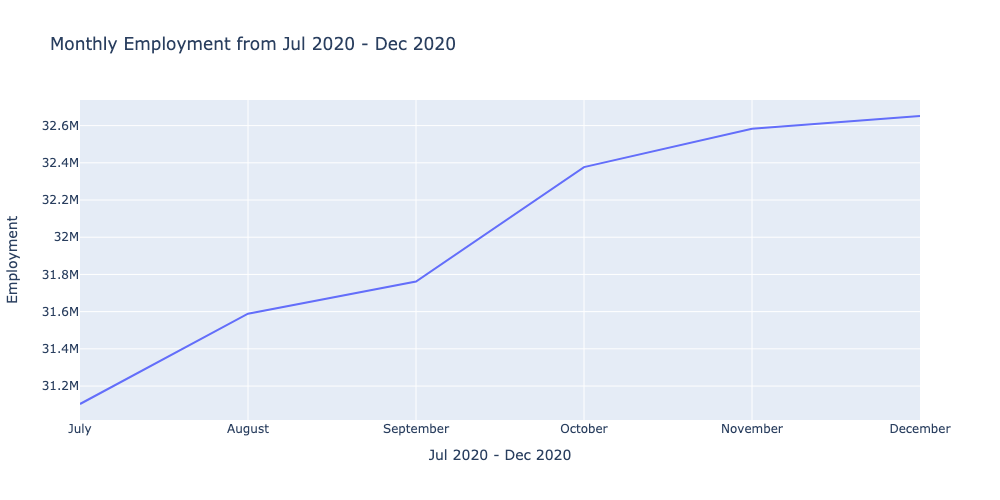

In [31]:
Image(filename="employment.png")

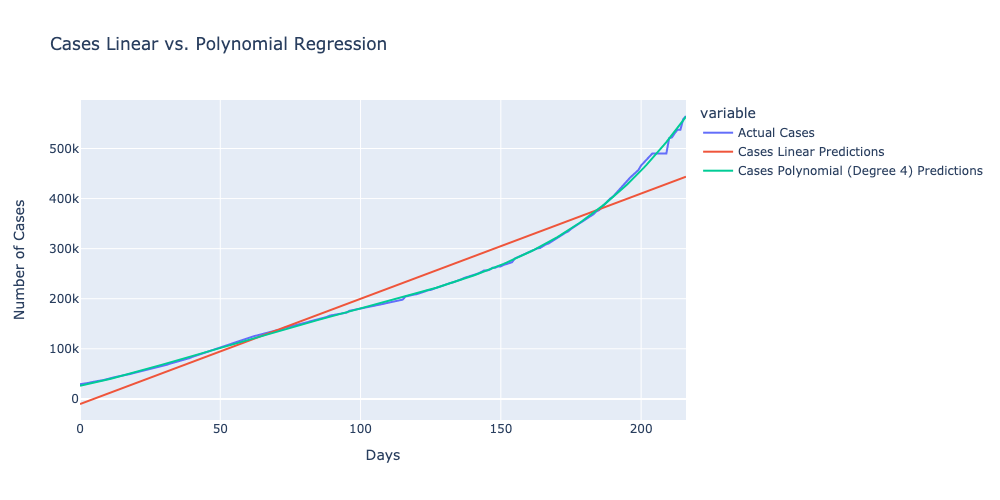

In [32]:
Image(filename="fig_cases.png")

In [33]:
df = pd.DataFrame({'Employment': nc_employment_data, 'DailyCases': daily_cases_nc_data})
df = df.replace([np.inf, -np.inf], np.nan).dropna()
correlation_coefficient, p_value = pearsonr(df['Employment'], df['DailyCases'])

print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

Correlation Coefficient: 0.95


__Result:__ The graphs support the Hypothesis that "Continuously rising employment led to an increase in COVID-19 cases" by showing a positive correlation between the rising employment and increasing COVID-19 cases, hence we reject the Null hypothesis.

### Hypothesis 2: Counties with High wages experienced an increase in COVID-19 cases due to encouraged employment because of high wages

__Null Hypothesis (H0):__ There is no significant relationship between wages and the increase in COVID-19 cases in counties.  
__Alternative Hypothesis (H1):__ Counties with high wages experienced a significant increase in COVID-19 cases due to encouraged employment because of high wages.

In [34]:
nc_mecklenburg_jul_aug_sep = employment_jul_aug_sep[employment_jul_aug_sep["Area"] == "Mecklenburg County, North Carolina"]
nc_mecklenburg_county_wages = nc_mecklenburg_jul_aug_sep["Total Quarterly Wages"].sum()
nc_mecklenburg_oct_nov_dec = employment_oct_nov_dec[employment_oct_nov_dec["Area"] == "Mecklenburg County, North Carolina"]
nc_mecklenburg_county_wages = nc_mecklenburg_county_wages + nc_mecklenburg_oct_nov_dec["Total Quarterly Wages"].sum()

nc_wake_jul_aug_sep = employment_jul_aug_sep[employment_jul_aug_sep["Area"] == "Wake County, North Carolina"]
nc_wake_county_wages = nc_wake_jul_aug_sep["Total Quarterly Wages"].sum()
nc_wake_oct_nov_dec = employment_oct_nov_dec[employment_oct_nov_dec["Area"] == "Wake County, North Carolina"]
nc_wake_county_wages = nc_wake_county_wages + nc_wake_oct_nov_dec["Total Quarterly Wages"].sum()

nc_guilford_jul_aug_sep = employment_jul_aug_sep[employment_jul_aug_sep["Area"] == "Guilford County, North Carolina"]
nc_guilford_county_wages = nc_guilford_jul_aug_sep["Total Quarterly Wages"].sum()
nc_guilford_oct_nov_dec = employment_oct_nov_dec[employment_oct_nov_dec["Area"] == "Guilford County, North Carolina"]
nc_guilford_county_wages = nc_guilford_county_wages + nc_guilford_oct_nov_dec["Total Quarterly Wages"].sum()

nc_forsyth_jul_aug_sep = employment_jul_aug_sep[employment_jul_aug_sep["Area"] == "Forsyth County, North Carolina"]
nc_forsyth_county_wages = nc_forsyth_jul_aug_sep["Total Quarterly Wages"].sum()
nc_forsyth_oct_nov_dec = employment_oct_nov_dec[employment_oct_nov_dec["Area"] == "Forsyth County, North Carolina"]
nc_forsyth_county_wages = nc_forsyth_county_wages + nc_forsyth_oct_nov_dec["Total Quarterly Wages"].sum()

nc_durham_jul_aug_sep = employment_jul_aug_sep[employment_jul_aug_sep["Area"] == "Durham County, North Carolina"]
nc_durham_county_wages = nc_durham_jul_aug_sep["Total Quarterly Wages"].sum()
nc_durham_oct_nov_dec = employment_oct_nov_dec[employment_oct_nov_dec["Area"] == "Durham County, North Carolina"]
nc_durham_county_wages = nc_durham_county_wages + nc_durham_oct_nov_dec["Total Quarterly Wages"].sum()

In [35]:
county_wages = pd.Series([nc_mecklenburg_county_wages, nc_wake_county_wages, nc_guilford_county_wages, nc_forsyth_county_wages, nc_durham_county_wages])
county_names = ["Mecklenburg County", "Wake County", "Guilford County", "Forsyth County", "Durham County"]
county_wages.index = county_names

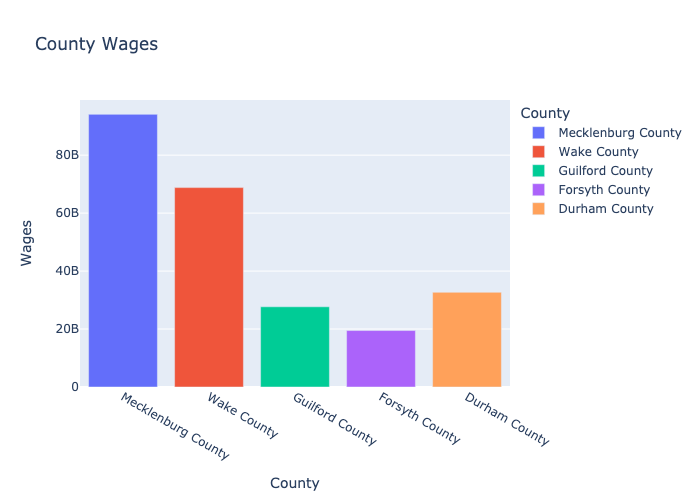

In [36]:
df = pd.DataFrame({"County": county_wages.index, "Wages": county_wages.values})

fig = px.bar(df, x='County', y='Wages', title='County Wages', labels={'Wages': 'Wages'}, color='County')

fig.write_image(f'County_Wages.png')

Image(filename="County_Wages.png")

### Recall, Our County Cases graphs showed:

__Mecklenburg County:__ Cases ranged from 0 to 65,000  
__Wake County:__ Cases ranged from 0 to 50,000  
__Guilford County:__ Cases ranged from 0 to 30,000  
__Forsyth County:__ Cases ranged from 0 to 30,000  
__Durham County:__ Cases ranged from 0 to 16,000  

__Result:__ The County Wages graph supports the Hypothesis that "Counties with High wages experienced an increase in COVID-19 cases due to encouraged employment because of high wages" by showing a positive correlation between the High wages and incresing Covid-19 cases, therefore we can reject the Null hypothesis.

### Hypothesis 3: Low wages led to an increase in COVID-19 cases due to missing COVID-19 health resources

__Null Hypothesis (H0):__ Low wages do not lead to an increase in COVID-19 cases, and there is no association between low wages and the availability of COVID-19 health resources.  
__Alternative Hypothesis (H1):__ Low wages lead to an increase in COVID-19 cases, and there is a significant association between low wages and the availability of COVID-19 health resources.

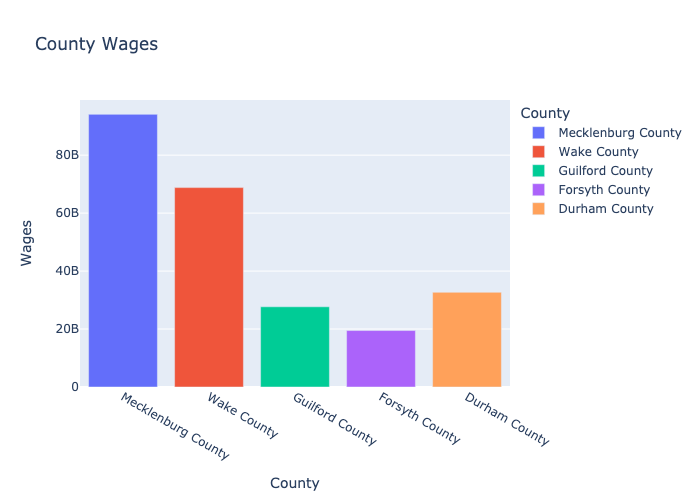

In [37]:
Image(filename="County_Wages.png")

### Recall, Our County Cases graphs showed:

__Mecklenburg County:__ Cases ranged from 0 to 65,000  
__Wake County:__ Cases ranged from 0 to 50,000  
__Guilford County:__ Cases ranged from 0 to 30,000  
__Forsyth County:__ Cases ranged from 0 to 30,000  
__Durham County:__ Cases ranged from 0 to 16,000  

__Result:__ The County Wages graph fails to support the Hypothesis that "Low wages led to an increase in COVID-19 cases due to missing COVID-19 health resources" by showing no correlation between the low wages and incresing Covid-19 cases, therefore we fail to reject the Null hypothesis.